1. 부산기온 데이터 수집
2. 부산에서 가장 더웠던 날은? 검색
3. 매년 크리스마스에 최고 기온과 최저 기온 추이 : plot 
4. 월별 기온 데이터: boxplot 

라이브러리 로드

In [3]:
!pip3 install matplotlib

In [4]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220921111551.csv' , header=6, encoding='euc-kr') # default: utf-8,
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43264 entries, 0 to 43263
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       43264 non-null  object 
 1   지점       43264 non-null  int64  
 2   평균기온(℃)  43264 non-null  float64
 3   최저기온(℃)  43254 non-null  float64
 4   최고기온(℃)  43260 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ MB


>* 컬럼 이름 바꾸기

In [7]:
df.rename(columns={ '평균기온(℃)':'평균기온', '최저기온(℃)':'최저기온', '최고기온(℃)':'최고기온'}, inplace= True)
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


>* 부산에서 가장 더웠던 날은?

In [8]:
df.sort_values(by=["최고기온"], ascending=False)

,날짜,지점,평균기온,최저기온,최고기온
41035,2016-08-14,159,31.7,28.3,37.3
28971,1983-08-04,159,30.8,26.5,36.7
41036,2016-08-15,159,29.4,25.3,36.6
41756,2018-08-05,159,31.3,28.1,36.4
41392,2017-08-06,159,31.7,27.6,36.2
...,...,...,...,...,...
3931,1915-01-13,159,-11.3,-14.0,-8.2
9,1904-04-18,159,11.7,9.0,NaN
11,1904-04-20,159,11.9,NaN,NaN
22961,1967-02-19,159,2.7,NaN,NaN


In [9]:
df[df["최고기온"]==df["최고기온"].max()]

,날짜,지점,평균기온,최저기온,최고기온
41035,2016-08-14,159,31.7,28.3,37.3


In [10]:
# 결측데이터 삭제

df.dropna(inplace=True)

In [11]:
# 날짜 데이터 Str -> date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

>* 매년 크리스마스 최고기온 최저기온 추이

In [12]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [13]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1904-04-09,159,11.3,7.8,16.1,1904,4,9
1,1904-04-10,159,9.3,4.7,15.2,1904,4,10
3,1904-04-12,159,11.3,8.8,13.4,1904,4,12
4,1904-04-13,159,14.5,11.1,16.9,1904,4,13
5,1904-04-14,159,9.4,8.6,16.0,1904,4,14


매년 12월 25일의 데이터만 추출

In [14]:
xmas_df = df[ (df['월'] == 12) & (df['일'] == 25)   ]
xmas_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
260,1904-12-25,159,2.5,-1.5,7.7,1904,12,25
625,1905-12-25,159,11.6,10.5,14.8,1905,12,25
990,1906-12-25,159,0.3,-4.8,3.8,1906,12,25
1355,1907-12-25,159,9.1,5.3,13.9,1907,12,25
1721,1908-12-25,159,3.8,-0.6,9.1,1908,12,25


Text(0, 1, 'max temperature (℃)')

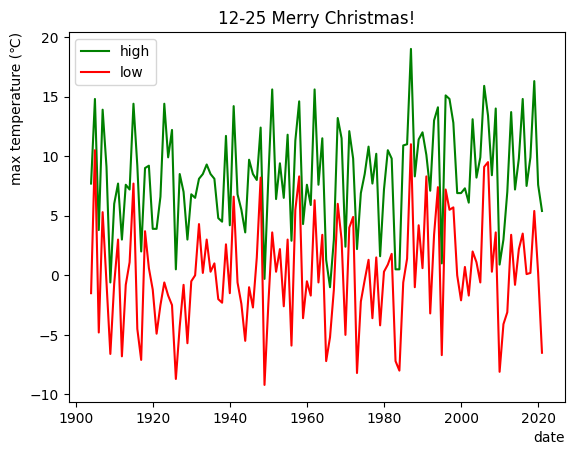

In [15]:
plt.plot(xmas_df['년'], xmas_df['최고기온'], color='green', label='high')
plt.plot(xmas_df['년'], xmas_df['최저기온'], color='r', label= 'low')
plt.title('12-25 Merry Christmas!')
plt.legend()
plt.xlabel('date', loc='right')
plt.ylabel('max temperature (℃)', loc = 'top')

>* 월별 기온 데이터

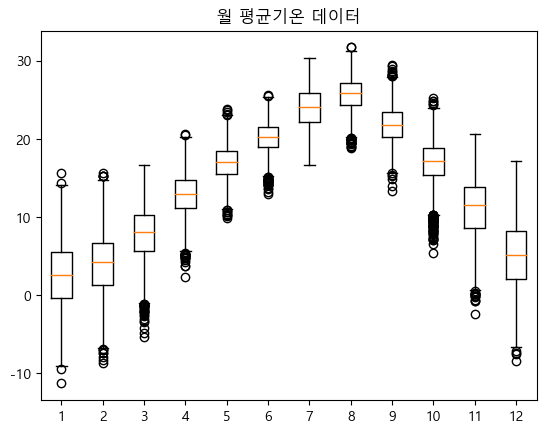

평균 온도는 14.17
최고온도는 31.7
최저온도는 -11.3


In [17]:
# 한글 사용시 설정
plt.rc('font',family='Malgun Gothic')      #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic'
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

avg_month = []
max_month = []
min_month = []

plt.title('월 평균기온 데이터')

for i in range(1, 13):
    avg_month.append(df.loc[df['월']==i, '평균기온'])
    max_month.append(df.loc[df['월']==i, '최고기온'])
    min_month.append(df.loc[df['월']==i, '최저기온'])

plt.boxplot(avg_month)
plt.show()

avg_temp = round(df['평균기온'].mean(),2)
print(f'평균 온도는 {avg_temp}')
avg_max_temp = round(df['평균기온'].max(),2)
print(f'최고온도는 {avg_max_temp}')
avg_min_temp = round(df['평균기온'].min(),2)
print(f'최저온도는 {avg_min_temp}')